In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Load the loan approval dataset
loan_df = pd.read_csv("loan_approval_data.csv")

In [3]:
# Drop unique identifier as it does not contribute to prediction
loan_df=loan_df.drop(columns=['Applicant_ID'], axis=1)

In [4]:
# Identify numerical columns (float type) to handle missing values
# separately using appropriate numerical imputation strategies
num_mis_val = loan_df.select_dtypes(include=['float64']).columns

# Identify categorical columns (object type) for separate
# categorical missing value treatment (e.g., mode imputation)
cat_mis_val = loan_df.select_dtypes(include=['object']).columns

In [5]:
# i learnt this new method of filling the missing value

# Handle missing values using SimpleImputer
# Numerical features are imputed with the mean to preserve overall distribution
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns
num_imp = SimpleImputer(strategy='mean')
loan_df[num_mis_val] = num_imp.fit_transform(loan_df[num_mis_val])

# Impute missing values in categorical columns
# Most frequent value (mode) is used to retain category consistency
cat_imp = SimpleImputer(strategy='most_frequent')
loan_df[cat_mis_val] = cat_imp.fit_transform(loan_df[cat_mis_val])


# EDA- Exploratory Data Analysis


Text(0.5, 1.0, 'Loan Approved')

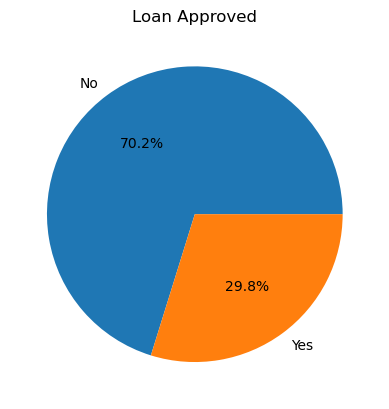

In [6]:
# knowing how balanced our classes are?
class_cont=loan_df['Loan_Approved'].value_counts()
plt.pie(
    class_cont,labels=['No','Yes'],autopct='%1.1f%%'
)
plt.title('Loan Approved')

<Axes: xlabel='Applicant_Income', ylabel='Count'>

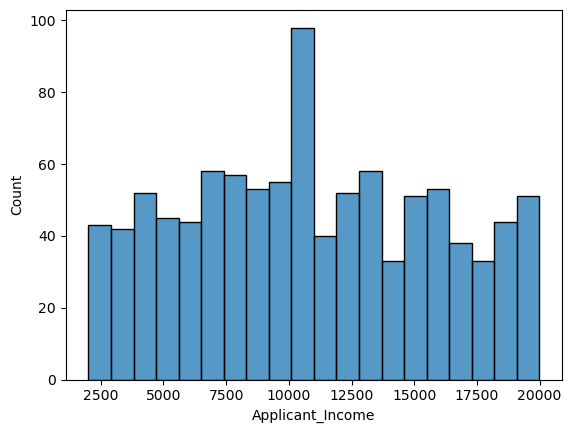

In [7]:
# analyze income
sns.histplot(
    data= loan_df,
    x='Applicant_Income',
    bins=20
)

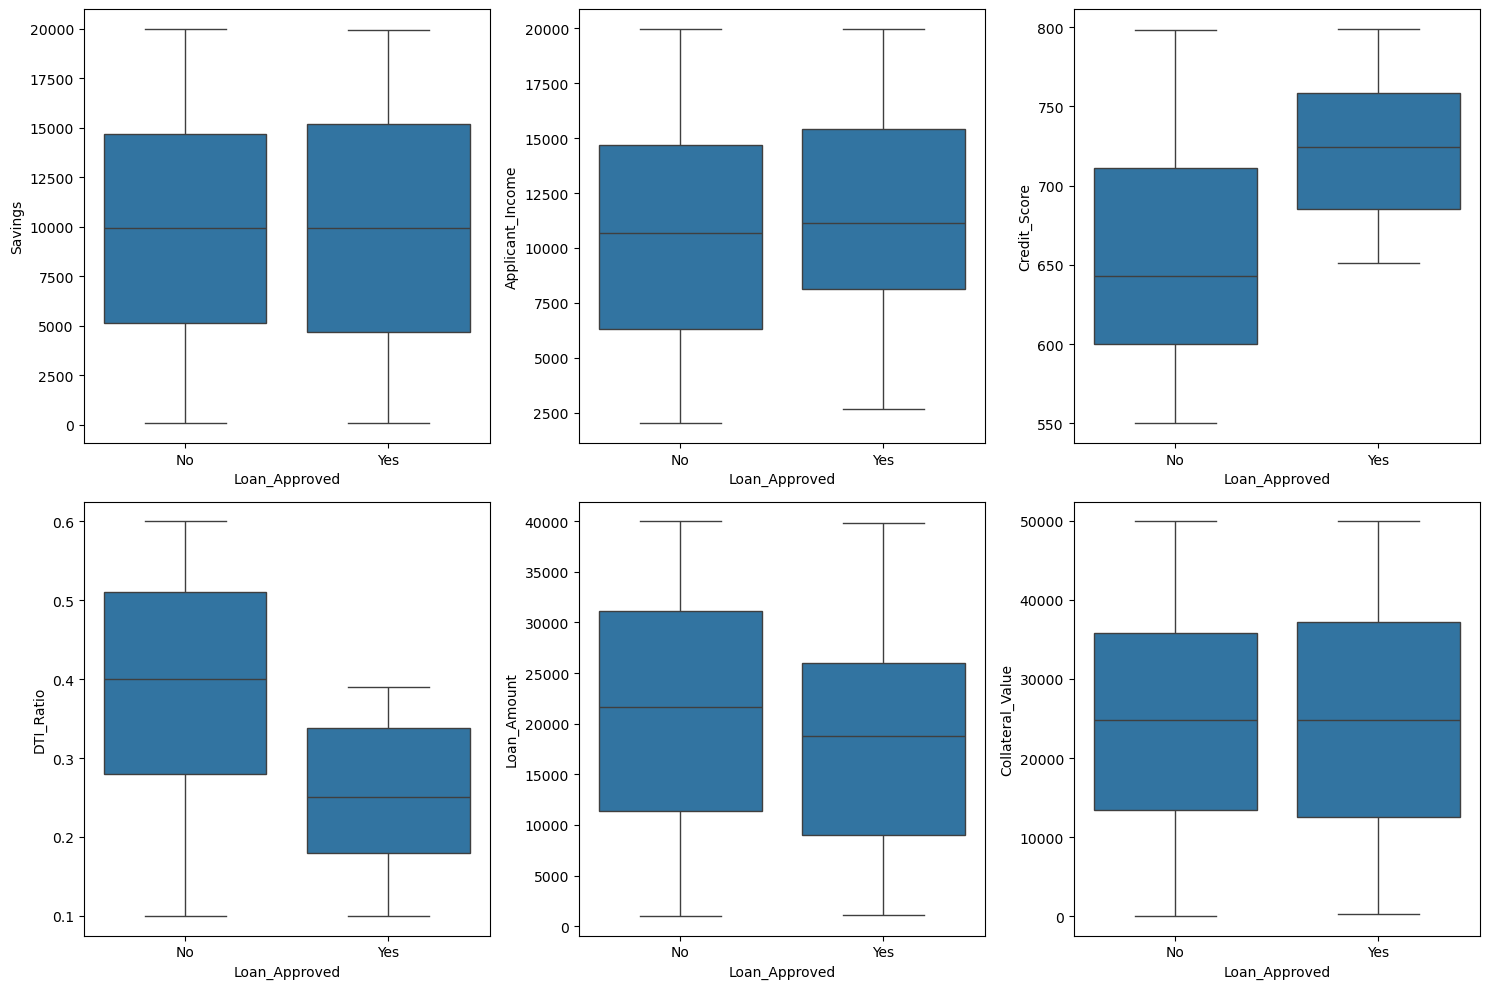

In [8]:
# outliers detection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=loan_df, x='Loan_Approved', y='Savings')
sns.boxplot(ax=axes[0, 1], data=loan_df, x='Loan_Approved', y='Applicant_Income')
sns.boxplot(ax=axes[0, 2], data=loan_df, x='Loan_Approved', y='Credit_Score')

sns.boxplot(ax=axes[1, 0], data=loan_df, x='Loan_Approved', y='DTI_Ratio')
sns.boxplot(ax=axes[1, 1], data=loan_df, x='Loan_Approved', y='Loan_Amount')
sns.boxplot(ax=axes[1, 2], data=loan_df, x='Loan_Approved', y='Collateral_Value')

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

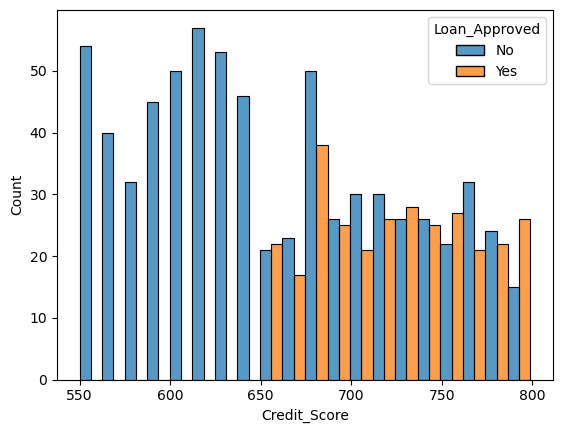

In [9]:
# Credit Score with loan approved 
sns.histplot(
    data=loan_df,
    x='Credit_Score',
    hue='Loan_Approved',
    bins=20,
    multiple='dodge'
)

# correlation heatmaps ( new thing learnt)


In [10]:
# Select only numerical columns for correlation analysis
num_cols = loan_df.select_dtypes(include='number')

# Compute correlation matrix to understand linear relationships
# between numerical features
corr_matrix = num_cols.corr()

<Axes: >

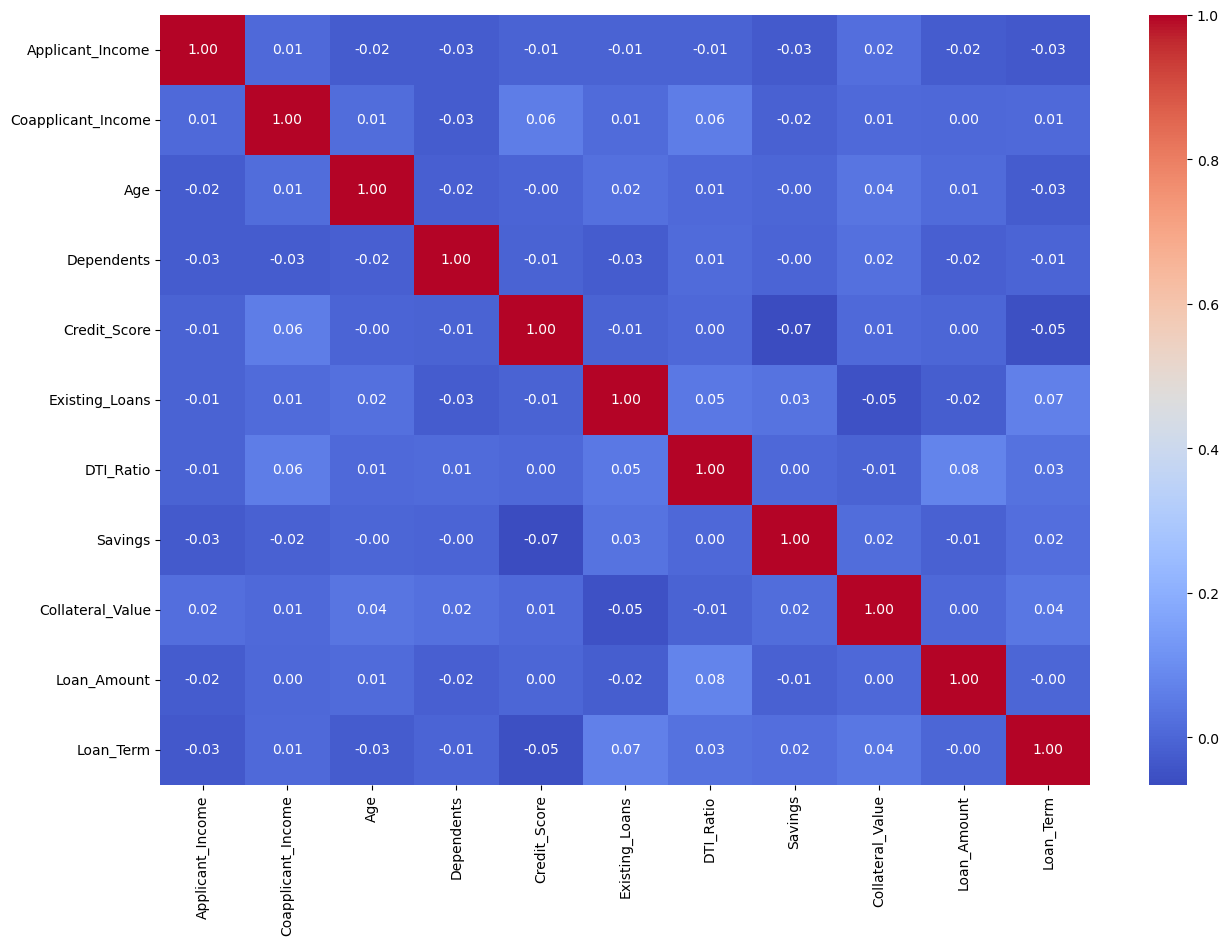

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(
    corr_matrix,
    annot= True,
    cmap = 'coolwarm',
    fmt='.2f'
)